In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load image then grayscale
image = cv2.imread('../../images/chess.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

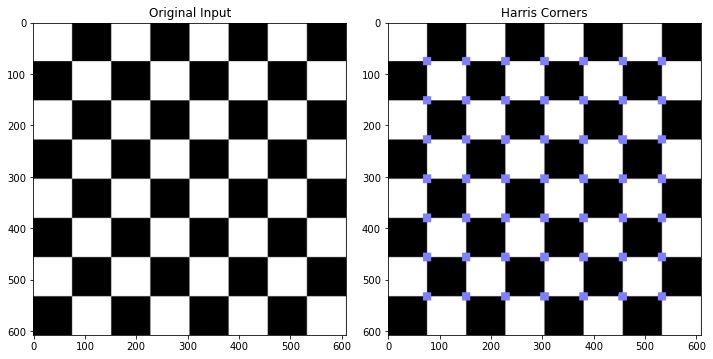

In [3]:
temp_output = image.copy()

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Input')
cv2.imwrite('input.jpg', image)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them\
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Threshold for an optimal value, it may vary depending on the image.
temp_output[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

axs[1].imshow(cv2.cvtColor(temp_output, cv2.COLOR_BGR2RGB))
axs[1].set_title('Harris Corners')
cv2.imwrite('harris_corners.jpg', temp_output)

plt.show()

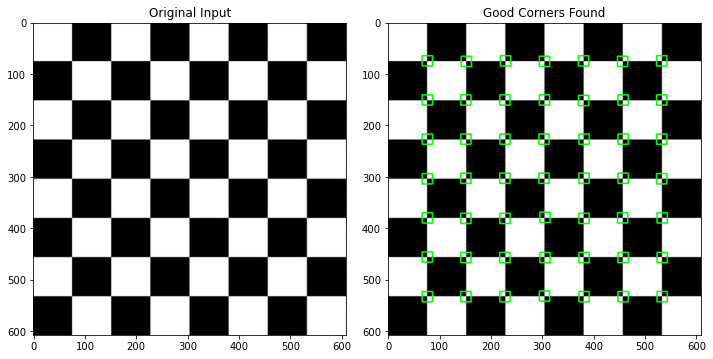

In [4]:
temp_output = image.copy()

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Input')
cv2.imwrite('input.jpg', image)

# We specific the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 49, 0.01, 15)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(temp_output,(x-10,y-10),(x+10,y+10),(0,255,0), 2)

axs[1].imshow(cv2.cvtColor(temp_output, cv2.COLOR_BGR2RGB))
axs[1].set_title('Good Corners Found')
cv2.imwrite('good_corners_found.jpg', temp_output)

plt.show()